In [ ]:
### Overview
## 1. Technical Analysis
## 2. Simple Techniques
## 3. Using technical analysis API

In [ ]:
## 1. Technical Analysis
# The central idea is the supply and demand as interpred theough price action
# Hundreds of indicators all derived from price action and volume
# All fall into one or more of the followding categories
#  1.1. Trend
#  1.2. Volatility
#  1.3. Momentum
#  1.4. Volume

# There are numerous third party TA products
# pip install ta

In [2]:
import sys

### Installing technical analysis (ta)
!{sys.executable} -m pip install ta

  Created wheel for ta: filename=ta-0.7.0-cp37-none-any.whl size=28722 sha256=abde88fefc77394f271a665d175c689ea9ac0fb816886266f2a28da8769feda2
  Stored in directory: C:\Users\jusamano\AppData\Local\pip\Cache\wheels\dd\88\30\de9553fb54a474eb7480b937cdbb140bdda613d29cf4da7994
Successfully built ta


In [3]:
### Build the environment

import numpy as np
import pandas as pd
import pandas_datareader as pdr
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
aapl = pdr.get_data_yahoo('AAPL', '20150101')
aapl.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.861401
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.161013
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.163294
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.502111
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.443539


In [5]:
### The most common TA is the use of moving avarages
### 21 days is a hole trading month and 63 will be a 3 month period
aapl['21-day'] = aapl.Close.rolling(21).mean()
aapl['63-day'] = aapl.Close.rolling(63).mean()
aapl.tail()

,High,Low,Open,Close,Volume,Adj Close,21-day,63-day
Date,,,,,,,,
2021-03-26,121.480003,118.919998,120.349998,121.209999,93958900.0,121.209999,121.945714,129.148254
2021-03-29,122.580002,120.730003,121.650002,121.389999,80819200.0,121.389999,121.951904,128.980317
2021-03-30,120.400002,118.860001,120.110001,119.900002,85671900.0,119.900002,121.576190,128.713809
2021-03-31,123.519997,121.150002,121.650002,122.150002,118323800.0,122.150002,121.434761,128.511905
2021-04-01,124.180000,122.489998,123.660004,123.000000,74957400.0,123.000000,121.479523,128.341746


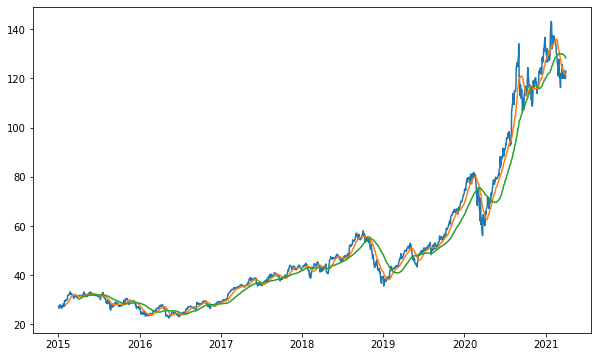

In [6]:
### Now, lets see this how behaives as a graph
plt.rcParams["figure.figsize"] = (10,6)
plt.plot(aapl[['Close','21-day','63-day']])

In [7]:
### Bollinger Bands - Volatility
## We need to create an array for the standard diviation
aapl['std'] = aapl['Close'].rolling(21).std()

In [9]:
aapl['std'].tail()

Date
2021-03-26    2.492482
2021-03-29    2.490855
2021-03-30    2.135998
2021-03-31    1.982427
2021-04-01    2.007702
Name: std, dtype: float64

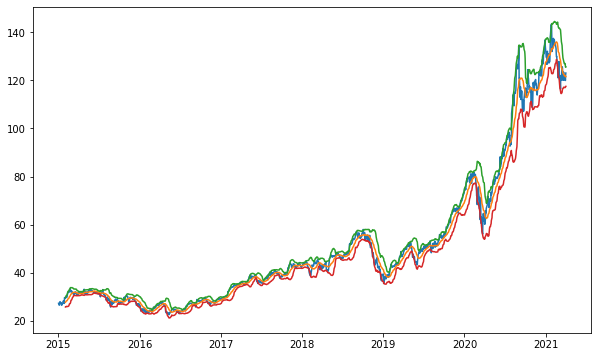

In [10]:
### The standard for Bollinger Bands is 20 days
plt.plot(aapl["Close"])
plt.plot(aapl["21-day"])
plt.plot(aapl['21-day'] + 2 * aapl['std'])
plt.plot(aapl['21-day'] - 2 * aapl['std'])

In [11]:
### Using the TA library
### https://technical-analysis-library-in-python.readthedocs.io/en/latest/
import ta

In [12]:
### RSI - Volatility Indicator
### The default is 14 days
aapl['rsi'] = ta.momentum.rsi(aapl['Close'],14)

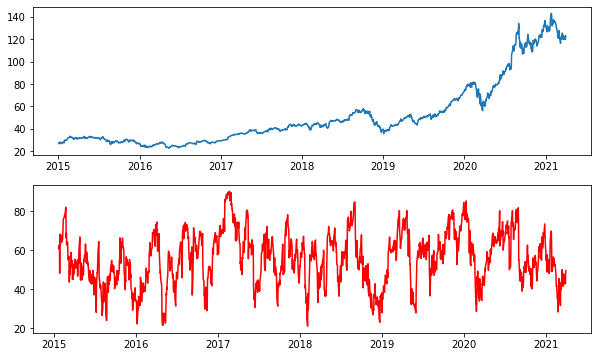

In [13]:
### The next couple of commands will draw to graphs the normal close price on the top and the RSI (risk) bellow

fig, axes = plt.subplots(2,1)
axes[0].plot(aapl.Close)
axes[1].plot(aapl.rsi, 'r')

In [14]:
### there is hundreds on the TA library
help(ta)

Help on package ta:

NAME
    ta

DESCRIPTION
    It is a Technical Analysis library useful to do feature
    engineering from financial time series datasets (Open,
    Close, High, Low, Volume). It is built on Pandas and Numpy.
    
    .. moduleauthor:: Dario Lopez Padial (Bukosabino)

PACKAGE CONTENTS
    momentum
    others
    trend
    utils
    volatility
    volume
    wrapper

FUNCTIONS
    add_all_ta_features(df: pandas.core.frame.DataFrame, open: str, high: str, low: str, close: str, volume: str, fillna: bool = False, colprefix: str = '') -> pandas.core.frame.DataFrame
        Add all technical analysis features to dataframe.
        
        Args:
            df (pandas.core.frame.DataFrame): Dataframe base.
            open (str): Name of 'open' column.
            high (str): Name of 'high' column.
            low (str): Name of 'low' column.
            close (str): Name of 'close' column.
            volume (str): Name of 'volume' column.
            fillna(bool): if Tr